# Generate Data for Overview

In [2]:
import sys
sys.path.append("..")

In [35]:
!python ../src/simulate_data.py -n 5000 -m 5 --size 10 -p 3 -k 0 --cov 0.0001 -o ../data/overview/sim -l 0 -a 0.01 -b 0.01 -s 2027

Namespace(n=5000, m=5, p=3, k=0, o='../data/overview/sim', s=2027, size=10, d=0, cov=0.0001, a=0.01, b=0.01, ado=15, maxcn=8, readthreshold=5, vafthreshold=0.1, l=0.0, v=False)
n_mutation_groups: 5 n_cells: 5000 n_leaves: 4
/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/simulate_data.py:182: RuntimeWarning: invalid value encountered in divide
  VAF_mat = Vcount / Rtotal
/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/simulate_data.py:295: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.index)
/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/simulate_data.py:295: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.ind

In [ ]:
# !python ../src/data_processors/kmeans_clustering_for_scope.py -i ../data/overview/sim \
#      -o ../data/ --start_k 5 --end_k 5

/Users/samin/workspace/scWGS-Tumor-Phylogeny/.venv/lib/python3.13/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/samin/workspace/scWGS-Tumor-Phylogeny/.venv/lib/python3.13/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/samin/workspace/scWGS-Tumor-Phylogeny/.venv/lib/python3.13/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/samin/workspace/scWGS-Tumor-Phylogeny/.venv/lib/python3.13/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (4) found smaller than

In [18]:
import pandas as pd
import numpy as np
from src.solve_ilp_2 import solve_cncff

In [21]:
F_hi = pd.read_csv("../data/overview/F_plus_changed.csv")
F_lo = pd.read_csv("../data/overview/F_plus_changed.csv")

F_hi.index = list("ABC")
F_lo.index = list("ABC")

F_hi, F_lo

(   cluster_id    0    1    2    3
 A           0  0.5  0.3  0.2  0.0
 B           1  1.0  0.0  0.0  0.5
 C           2  1.0  0.0  1.0  0.0,
    cluster_id    0    1    2    3
 A           0  0.5  0.3  0.2  0.0
 B           1  1.0  0.0  0.0  0.5
 C           2  1.0  0.0  1.0  0.0)

In [23]:
solutions, _, _ =  solve_cncff(F_plus=F_hi, F_minus=F_lo, n_clones=5, cluster_weights=[1] * 6, only_mutation_tree_variant=True, cluster_not_at_root=False)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2687964
Academic license 2687964 - for non-commercial use only - registered to sa___@iict.buet.ac.bd
Set parameter TimeLimit to value 600
Set parameter PoolSearchMode to value 2
Set parameter PoolSolutions to value 10
Set parameter PoolGap to value 0
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[arm] - Darwin 24.6.0 24G90)

CPU model: Apple M4
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Non-default parameters:
TimeLimit  600
PoolSearchMode  2
PoolGap  0

Academic license 2687964 - for non-commercial use only - registered to sa___@iict.buet.ac.bd
Optimize a model with 964 rows, 215 columns and 2703 nonzeros
Model fingerprint: 0x9d28ac69
Model has 30 quadratic constraints
Variable types: 105 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [2e-01, 2e+01]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [2e+01, 2e+01]
  Objecti

In [24]:
from src.phylogeny_utils import *
import os

In [25]:
output_prefix = "../data/overview"

unique_solutions = []
solution_strs = {}


for i, solution in enumerate(solutions):
    try:
        solution_path = f"{output_prefix}/solution_{i}"
        os.makedirs(solution_path, exist_ok=True)

        X, B, U, F, G = solution
        
        X.to_csv(f"{solution_path}/X.csv")
        B.to_csv(f"{solution_path}/B.csv")
        U.to_csv(f"{solution_path}/U.csv")
        F.to_csv(f"{solution_path}/F.csv")
        G.to_csv(f"{solution_path}/G.csv")

        solT_mut, _ = generate_perfect_phylogeny(B)
        fixed_T = add_clusters_to_clonal_T(solT_mut, X, G, B)
        T_code = canonical_form(fixed_T)

        draw_clone_tree(fixed_T, f"{solution_path}/T.svg")

        if T_code not in solution_strs:
            print(i)
            solution_strs[T_code] = i
            unique_solutions.append(solution)
        else:
            print(i, 'same as', solution_strs[T_code])
        
    except Exception as e:
        print(e)

0
1


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


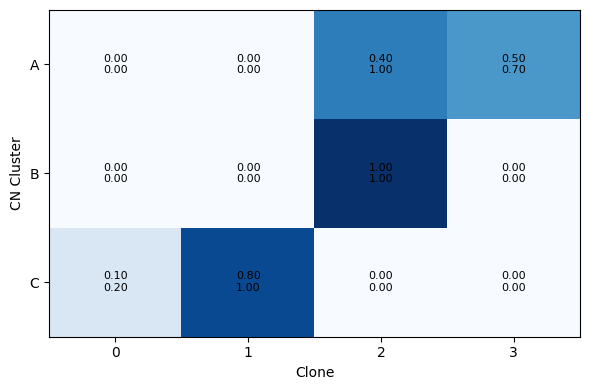

In [100]:
hi = F_hi.drop(columns="cluster_id")
lo = F_lo.drop(columns="cluster_id")

# Compute midpoint for color intensity
mid = (hi + lo) / 2

# Build annotation DataFrame manually
annot = pd.DataFrame(index=hi.index, columns=hi.columns)
for i in hi.index:
    for j in hi.columns:
        annot.loc[i, j] = f"{lo.loc[i, j]:.2f}\n{hi.loc[i, j]:.2f}"

# Plot
plt.figure(figsize=(6, 4))
im = plt.imshow(mid, cmap="Blues", aspect="auto")

# plt.colorbar(im, label="Mean value")
plt.xticks(np.arange(len(mid.columns)), mid.columns)
plt.yticks(np.arange(len(mid.index)), mid.index)
plt.xlabel("Clone")
plt.ylabel("CN Cluster")

# Annotate
for i in range(mid.shape[0]):
    for j in range(mid.shape[1]):
        plt.text(j, i, annot.iloc[i, j],
                 ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()

# Input matrix

In [4]:
import matplotlib.pyplot as plt

In [14]:
import numpy as np

# Grid size
rows, cols = 100, 150
prob_1 = 0.1  # probability of 1

# Set random seed for reproducibility
rng = np.random.default_rng(seed=42)

# Generate random matrix
matrix = (rng.random((rows, cols)) < prob_1).astype(int)

# Check result
print(matrix)
print("Number of 1s:", np.sum(matrix))


[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Number of 1s: 1444


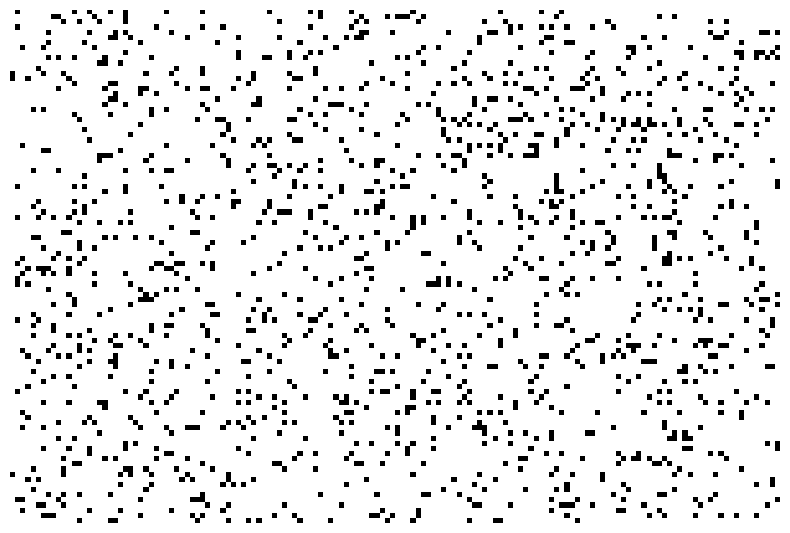

In [15]:
shuffled_indices = rng.permutation(cols)
matrix_ = matrix[:, shuffled_indices]


plt.figure(figsize=(8, 12))
plt.imshow( 1 - matrix_, cmap="gray", interpolation="none", origin="upper")

# # Draw subgrid boundaries for clarity
# for y in row_bounds[1:-1]:
#     plt.axhline(y - 0.5, color="red", linewidth=0.5)
# for x in col_bounds[1:-1]:
#     plt.axvline(x - 0.5, color="red", linewidth=0.5)

plt.axis("off")
plt.tight_layout()
plt.savefig("total.svg", bbox_inches="tight", pad_inches=0)
plt.show()

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


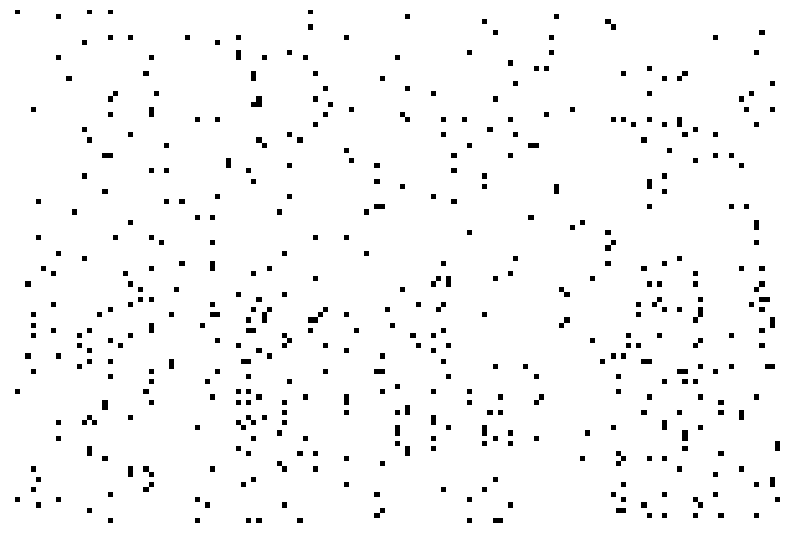

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Grid size
rows, cols = 100, 150

# Table of p_dark values (3x4)
p_dark_table = np.array([
    [0.5, 0.3, 0.2, 0.0],
    [1.0, 0.0, 0.0, 0.5],
    [1.0, 0.0, 1.0, 0.0]
])

# Non-uniform subgrid sizes
sub_heights = [50, 20, 30]     # Must sum to rows
sub_widths  = [45, 30, 25, 50] # Must sum to cols

# Error rate (fraction of cells that flip)
error_rate = 0.0

rng = np.random.default_rng(seed=42)

# Prepare output array for grayscale intensities (float 0–1)
grid = np.ones((rows, cols))

# Boundaries for subgrids
row_bounds = np.cumsum([0] + sub_heights)
col_bounds = np.cumsum([0] + sub_widths)

# Fill each subgrid
for i in range(len(sub_heights)):
    for j in range(len(sub_widths)):
        r0, r1 = row_bounds[i], row_bounds[i+1]
        c0, c1 = col_bounds[j], col_bounds[j+1]
        p = p_dark_table[i, j]

        # Random mask of which cells are "dark"
        dark_mask = rng.random((r1 - r0, c1 - c0)) < p

        # Assign random grey shades:
        # Dark cells: uniform random in [0.2, 0.7]
        # White cells: uniform random in [0.9, 1.0]

        grid[r0:r1, c0:c1] = dark_mask

grid = grid * matrix

grid = 1 - grid
print(grid.T)

# Apply random flip errors
error_mask = rng.random((rows, cols)) < error_rate
grid[error_mask] = 1.0 - grid[error_mask]  # invert brightness for noise


grid = grid[:, shuffled_indices]

# Plot the result
plt.figure(figsize=(8, 12))
plt.imshow(grid, cmap="gray", interpolation="none", origin="upper")

# # Draw subgrid boundaries for clarity
# for y in row_bounds[1:-1]:
#     plt.axhline(y - 0.5, color="red", linewidth=0.5)
# for x in col_bounds[1:-1]:
#     plt.axvline(x - 0.5, color="red", linewidth=0.5)

plt.axis("off")
plt.tight_layout()
plt.savefig("variant.svg", bbox_inches="tight", pad_inches=0)
plt.show()


In [8]:
grid[0][0], grid[-1][0], grid[0][-1], grid[-1][-1]

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0))

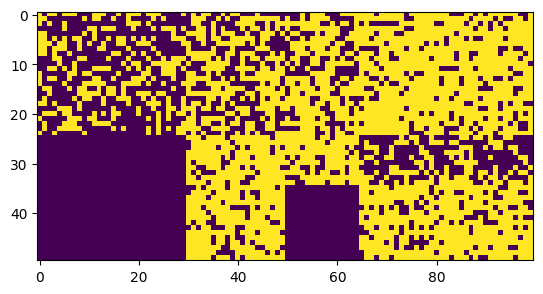

In [145]:
plt.imshow(grid)

In [136]:
grid

array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 0., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]], shape=(50, 100))

In [112]:
import pandas as pd

In [3]:
df = pd.read_csv("../scratch/data/ov2295_clone_snvs.csv.gz")
df

/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_32366/3028832705.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../scratch/data/ov2295_clone_snvs.csv.gz")


,chrom,coord,ref,alt,clone_id,ref_counts,alt_counts,total_counts,is_present,is_het,is_hom
0,1,985349,G,A,A,18,0,18,0,0,0
1,1,985349,G,A,B,19,0,19,0,0,0
2,1,985349,G,A,C,14,0,14,0,0,0
3,1,985349,G,A,D,18,0,18,0,0,0
4,1,985349,G,A,E,6,10,23,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
126607,X,154563943,T,A,E,0,10,13,1,1,0
126608,X,154563943,T,A,F,0,10,14,1,1,0
126609,X,154563943,T,A,G,22,0,22,0,0,0
126610,X,154563943,T,A,H,10,0,10,0,0,0


# B-allele Frequency

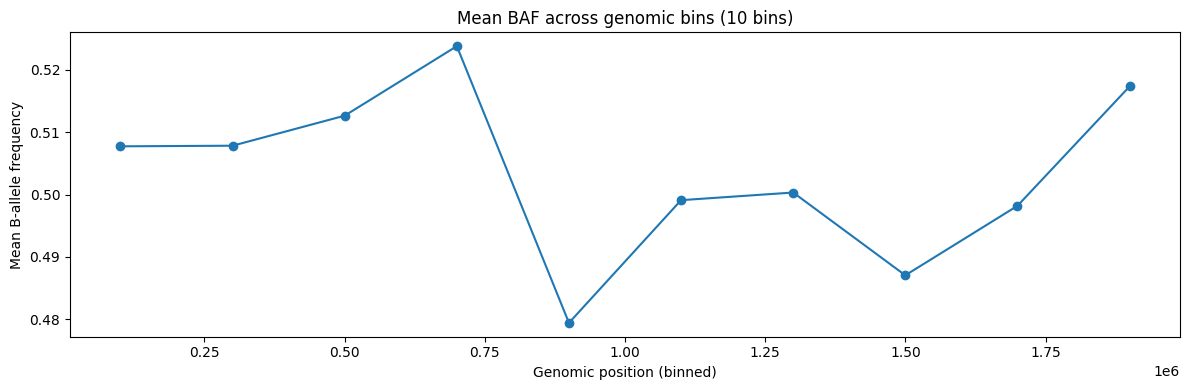

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------
# Replace these with your real data
# -------------------------------------------
# df = pd.read_csv("your_data.csv")
# positions = df["pos"].values
# baf = df["baf"].values

# Example placeholders (remove these)
positions = np.sort(np.random.randint(1, 2_000_000, 2000))  # genomic coordinates
baf = np.random.rand(2000)

# -------------------------------------------
# Bin by genomic position into 10 bins
# -------------------------------------------
num_bins = 10
bins = np.linspace(positions.min(), positions.max(), num_bins + 1)

bin_idx = np.digitize(positions, bins)

# Compute mean BAF per genomic bin
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_means = [baf[bin_idx == i].mean() if np.any(bin_idx == i) else np.nan
             for i in range(1, len(bins))]

# -------------------------------------------
# Plot: genomic bins on x-axis, BAF on y-axis
# -------------------------------------------
plt.figure(figsize=(12, 4))
plt.plot(bin_centers, bin_means, marker='o')

plt.xlabel("Genomic position (binned)")
plt.ylabel("Mean B-allele frequency")
plt.title("Mean BAF across genomic bins (10 bins)")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_discrete_baf(values, filename):
    expanded_values = np.repeat(values, 1000)
    x = np.arange(len(expanded_values))

    plt.figure(figsize=(8, 1))

    # Make main line thicker
    plt.plot(x, expanded_values, linewidth=4)

    plt.ylim(0, 1)

    # Only 0 and 1 on y-axis
    plt.yticks([0, 1], ['0', '1'])

    # Remove x ticks
    plt.xticks([])

    ax = plt.gca()

    # Remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Make bottom and left axes 4× thicker
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)

    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    # plt.show()
    plt.close()

# Example use
bin_values = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5, 0.5]
plot_discrete_baf(bin_values, "P.svg")

bin_values = [0.5, 1, 1, 0.66, 0, 0.5, 0.33, 0.0, 0.5, 0.5]
plot_discrete_baf(bin_values, "Q.svg")

bin_values = [0.5, 1, 0.5, 0.5, 0, 0, 0, 0, 0.2, 0.3]
plot_discrete_baf(bin_values, "R.svg")
